# Bear Classifier 

## Upload a image of a bear and have my model classify it for you!
#### Note: Can only classify Teddy, Black, and Grizzly bears.

In [1]:
#hide
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

from fastai.vision.all import *
from fastai.vision.widgets import *

## First lets get the training data

In [2]:
!pip install -q jmd_imagescraper

from pathlib import Path
root = Path().cwd()/"images"

#rmtree(root) #Deletes all previous images

from jmd_imagescraper.core import *
duckduckgo_search(root, "Grizzly", "Grizzly bears", max_results=100)
duckduckgo_search(root, "Black", "Black bears", max_results=100)
duckduckgo_search(root, "Teddy", "Teddy bears", max_results=100)

Duckduckgo search: Grizzly bears


Duckduckgo search: Black bears


Duckduckgo search: Teddy bears


[Path('/notebooks/clean/images/Teddy/201_f1979f2f.jpg'),
 Path('/notebooks/clean/images/Teddy/202_094a7a9c.jpg'),
 Path('/notebooks/clean/images/Teddy/203_8f1608af.jpg'),
 Path('/notebooks/clean/images/Teddy/204_0d63b53b.jpg'),
 Path('/notebooks/clean/images/Teddy/205_2a38bb43.jpg'),
 Path('/notebooks/clean/images/Teddy/206_e4c1b32d.jpg'),
 Path('/notebooks/clean/images/Teddy/207_6724ed0d.jpg'),
 Path('/notebooks/clean/images/Teddy/208_691e388c.jpg'),
 Path('/notebooks/clean/images/Teddy/209_528dd8a7.jpg'),
 Path('/notebooks/clean/images/Teddy/210_ad2b5879.jpg'),
 Path('/notebooks/clean/images/Teddy/211_aaa4a83f.jpg'),
 Path('/notebooks/clean/images/Teddy/212_4c1b4cf5.jpg'),
 Path('/notebooks/clean/images/Teddy/213_3381684b.jpg'),
 Path('/notebooks/clean/images/Teddy/214_aec3ea2a.jpg'),
 Path('/notebooks/clean/images/Teddy/215_a3f04757.jpg'),
 Path('/notebooks/clean/images/Teddy/216_9b6cd68c.jpg'),
 Path('/notebooks/clean/images/Teddy/217_6d640633.jpg'),
 Path('/notebooks/clean/images/

### Lets view the data

In [3]:
from jmd_imagescraper.imagecleaner import *

display_image_cleaner(root)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

### Creating datablock

In [39]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  #Independent are images, dependent is the categories
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

dls = bears.dataloaders(root)

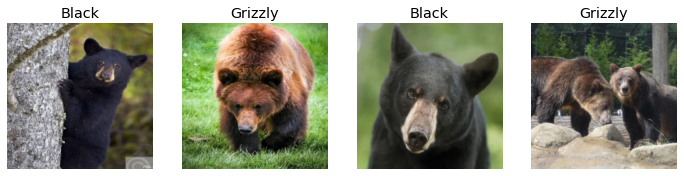

In [40]:
dls.valid.show_batch(max_n=4, nrows=1) #Viewing data

### Creating model and training

In [10]:
learner = cnn_learner(dls, resnet18, metrics = accuracy)
learner.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.955830,0.151302,0.961111,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.198822,0.065566,0.988889,00:11
1,0.122963,0.038051,0.994444,00:11


## Now lets export this model

In [41]:
learner.export(fname='bear.pkl')

In [42]:
path = Path()
path.ls(file_exts='.pkl')

(#2) [Path('bear.pkl'),Path('export.pkl')]

### Lets grab that model and test it with our images

In [43]:
learn_inf = load_learner(path/'bear.pkl')

In [36]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

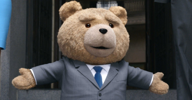

In [44]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [45]:
learn_inf.predict(img) #It got it correct!

('Teddy', TensorImage(2), TensorImage([7.3293e-08, 9.1892e-06, 9.9999e-01]))

## Now lets make this into an application/website

In [49]:
#getting widgets
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()
btn_run = widgets.Button(description='Classify')

### Method for what to do on click

In [50]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [51]:
btn_run.on_click(on_click_classify)

### VBox used to put all widgets togather

In [52]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])